In [1]:
import pandas as pd
from pathlib import Path as PPath

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import plotly.graph_objects as go

In [4]:
import ast

In [5]:
import re

In [6]:
PATH = './experiments/'

In [7]:
#%matplotlib inline

In [8]:
%matplotlib notebook

# Functions

In [ ]:
test_str  = '[704.7250945293949, 0, 0.0, 0.0, 30, 5.522710477581892]'
function(test_str)

In [10]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 0: # Hit obstacle (fit_obs) (max 1 hit)
        return 'infeasible'
    
    elif x[0] > 2: # Away from destination wp (fit_d) (max 2 meters)
        return 'verify'
    
    else:
        return 'feasible'

In [ ]:
pathlist = PPath(PATH).glob("**/mode_A*_exec_1_*.csv")

for i, p in enumerate(pathlist):
    print(p)
    
print('Qty: ', i+1)

In [ ]:
pathlist = PPath(PATH).glob("**/mode_G*_exec_1_*.csv")

quantity_feasibility = []

for path in pathlist:
    df = pd.read_csv(path)
    
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    quantity_feasibility.append({
        'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
        'qty_verify': df.loc[df['label']=='verify'].shape[0],
        'qty_feasible': df.loc[df['label']=='feasible'].shape[0],
        'best': df[df.fitness == df.fitness.min()].iloc[0]['label']
    })


In [ ]:
quantity_feasibility_df = pd.DataFrame(quantity_feasibility)
ax = quantity_feasibility_df.plot(figsize=(15,8))
ax.legend(['infeasible', 'verify', 'feasible'])
ax.set_xlabel('Map number')
ax.set_ylabel('Quantity of Routes')
ax.plot()
# mode__exec_1_category_routes

In [ ]:
plt.figure()
# color=['C2','C0','C1']
ax = quantity_feasibility_df['best'].value_counts().plot.barh(figsize=(10,5), color=['C2','C1','C0'])
ax.set_xlabel('Quantity of Maps')
ax.set_ylabel('Category')
# # mode__exec_1_category_maps

In [ ]:
quantity_feasibility_df

# Experiments

In [ ]:
# pathlist = PPath(MAPS_PATH).glob("**/*.sgl")

In [ ]:
df = pd.read_csv(PATH + 'mode_R-PC_map_06_exec_1_history.csv')
df.sample(20)

In [ ]:
%matplotlib notebook
plt.plot(df['birth_time'], df['fitness'])

In [ ]:
def plot(df):
    fig = go.Figure()
    for column in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df[column], name=column))
    fig.show()

In [ ]:
df_1 = df.groupby(['generation']).agg({'fitness': [np.min, np.mean]})
df_1.columns = df_1.columns.get_level_values(1)
plot(df_1)

In [ ]:
df_1

In [ ]:
# Gerar df de bests

ancestry = []

melhor = df.iloc[0]['fitness']
for i in range(df.shape[0]):
    if df.iloc[i]['fitness'] < melhor:
        melhor = df.iloc[i]['fitness']
        ancestry.append([df.iloc[i]['birth_time'], df.iloc[i]['generation'], melhor])

In [ ]:
df_ancestry = pd.DataFrame(ancestry, columns=['birth_time', 'generation', 'fitness'])

In [ ]:
df_ancestry

In [ ]:
plot(df_ancestry)

In [ ]:
plt.plot(df_ancestry['generation'], df_ancestry['fitness'])
plt.plot(df_1['mean'])

In [ ]:
df['fitness_trace'][0]

In [ ]:
ast.literal_eval(df['fitness_trace'])

In [ ]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 4000:
        return 'infeasible'
    
    elif x[0] > 500:
        return 'verify'
    
    else:
        return 'feasible'

In [ ]:
df['label'] = df['fitness_trace'].apply(lambda x: function(x))

In [ ]:
{
    'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
    'qty_verify': df.loc[df['label']=='verify'].shape[0],
    'qty_feasible': df.loc[df['label']=='feasible'].shape[0]
}

In [ ]:
df[df.fitness == df.fitness.min()].iloc[0]['label']

# Experiments

In [130]:
pathlist = PPath(PATH).glob("**/mode_EMA*_exec_1_*.csv")
dfs = []
map_numbers = []
for i, path in enumerate(pathlist):
    print(path)
    m = re.search(r'(_map_\d*_)',str(path))
    if m:
        found = m.group(1)
    number = re.sub(r"[A-Za-z/\-_\.]", "", found) 
    map_numbers.append(number)
    
    df = pd.read_csv(path)
    df = df[df['birth_time']<=180] #trim
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    df_feasible = pd.DataFrame(df[df['label']=='feasible'])
    df_feasible['label_count_cumulative'] = 1
    df_feasible['label_count_cumulative'] = df_feasible['label_count_cumulative'].cumsum()
    
    dfs.append(df_feasible)
    
    #if i == 5:
     #   break

experiments/mode_C/map_30/mode_C_map_30_exec_1_history.csv
experiments/mode_C/map_29/mode_C_map_29_exec_1_history.csv
experiments/mode_C/map_07/mode_C_map_07_exec_1_history.csv
experiments/mode_C/map_06/mode_C_map_06_exec_1_history.csv
experiments/mode_C/map_36/mode_C_map_36_exec_1_history.csv
experiments/mode_C/map_05/mode_C_map_05_exec_1_history.csv
experiments/mode_C/map_15/mode_C_map_15_exec_1_history.csv
experiments/mode_C/map_00/mode_C_map_00_exec_1_history.csv
experiments/mode_C/map_01/mode_C_map_01_exec_1_history.csv
experiments/mode_C/map_41/mode_C_map_41_exec_1_history.csv
experiments/mode_C/map_03/mode_C_map_03_exec_1_history.csv
experiments/mode_C/map_27/mode_C_map_27_exec_1_history.csv
experiments/mode_C/map_43/mode_C_map_43_exec_1_history.csv
experiments/mode_C/map_40/mode_C_map_40_exec_1_history.csv
experiments/mode_C/map_10/mode_C_map_10_exec_1_history.csv
experiments/mode_C/map_21/mode_C_map_21_exec_1_history.csv
experiments/mode_C/map_14/mode_C_map_14_exec_1_history.c

In [131]:
legends = [f'Map {i}' for i in map_numbers]

In [132]:
dic={}
for df, legend in zip(dfs, legends):
    grouped = df.groupby(df['birth_time'].apply(lambda x: round(x, 2))).count()
    dic[f"{legend}"] = grouped['label_count_cumulative'].cumsum()

In [133]:
dic = pd.DataFrame(dic)
dic = dic.fillna(method='ffill')

In [134]:
dic['Average'] = dic.mean(axis=1)
dic['Min'] = dic.min(axis=1)
dic['Max'] = dic.max(axis=1)

In [135]:
# plt.figure()
# plt.plot(dic)

<IPython.core.display.Javascript object>


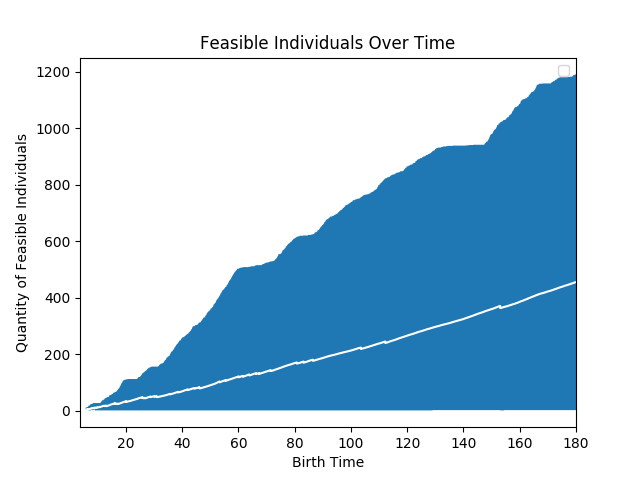

In [137]:
ax = dic.plot(y='Average', c='white', use_index=True)
dic['birth_time'] = dic.index
plt.fill_between(x='birth_time', y1='Min', y2='Max', data=dic)
plt.title(f'Feasible Individuals Over Time')
plt.xlabel('Birth Time')
plt.ylabel('Quantity of Feasible Individuals')
plt.legend([])

In [114]:
# plt.figure()
# for df_feasible in dfs:
#     plt.plot(df_feasible['birth_time'], df_feasible['label_count_cumulative'])

# plt.plot()
# plt.title(f'Feasible Individuals Over Time')
# plt.xlabel('Birth Time')
# plt.ylabel('Quantity of Feasible Individuals')
#plt.legend(legends)

In [ ]:
plt.plot(df['birth_time'], df['label_count_cumulative'])

In [ ]:
df['birth_time']

In [ ]:
df['label_count_cumulative']

# Experiments

In [ ]:
pathlist = PPath(PATH).glob("**/mode_EMA*_exec_1_*.csv")
dfs = []
map_numbers = []
for i, path in enumerate(pathlist):
    print(path)
    m = re.search(r'(_map_\d*_)',str(path))
    if m:
        found = m.group(1)
    number = re.sub(r"[A-Za-z/\-_\.]", "", found) 
    map_numbers.append(number)
    
    df = pd.read_csv(path)
    df = df[df['birth_time']<=180] #trim
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    df_feasible = pd.DataFrame(df[df['label']=='feasible'])
    df_feasible['label_count_cumulative'] = 1
    df_feasible['label_count_cumulative'] = df_feasible['label_count_cumulative'].cumsum()
    
    dfs.append(df_feasible)
    